# TestCase 2

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from create_jsonfile import ask_user,read_config,check_config

# ask_user()
config = read_config(configfile="configs/config2.json")

### Configuration has been read from config.json ###
# dimension : 1
# testcase : 2
# version : 1
# error_estimations : {'param_num': 2}
# gains : {'n_params': 100}


In [3]:
dimension = config["dimension"]
testcase = config["testcase"]
version = config["version"]   
# high_degree = 10

In [4]:
assert testcase == 2
check_config(config)

Config file is valid


## Imports + Load network

In [5]:
# export CUDA_VISIBLE_DEVICES=
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
from testcases.utils import create_tree

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
current_dir = os.getcwd()
repo_dir = os.path.dirname(current_dir)
repo_dir = os.path.dirname(repo_dir)
print(repo_dir)
# vérifier que repo_dir finit bien par "code" (à modifier pour l'utilisateur)
assert repo_dir.split("/")[-1] == "code"

/home/flecourtier/Bureau/Article1/code


In [8]:
if version == 1:
    from testcases.networks.test_1D.test_2.test_2_v1 import Run_laplacian1D,Poisson_1D
elif version == 2:
    from testcases.networks.test_1D.test_2.test_2_v2 import Run_laplacian1D,Poisson_1D
else:
    raise ValueError("Version not found")
from testcases.problem.problem_1D import TestCase2
problem = TestCase2(version=version)

Using device: cuda
cuda devices:        1
cuda current device: 0
cuda device name:    NVIDIA RTX 2000 Ada Generation Laptop GPU


hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).


/home/flecourtier/Bureau/Article1/code
torch loaded; device is cuda


init
init
>> load network /home/flecourtier/Bureau/Article1/code/networks/test_1D/test_fe2.pth
network loaded
Error  tensor([0.8280])


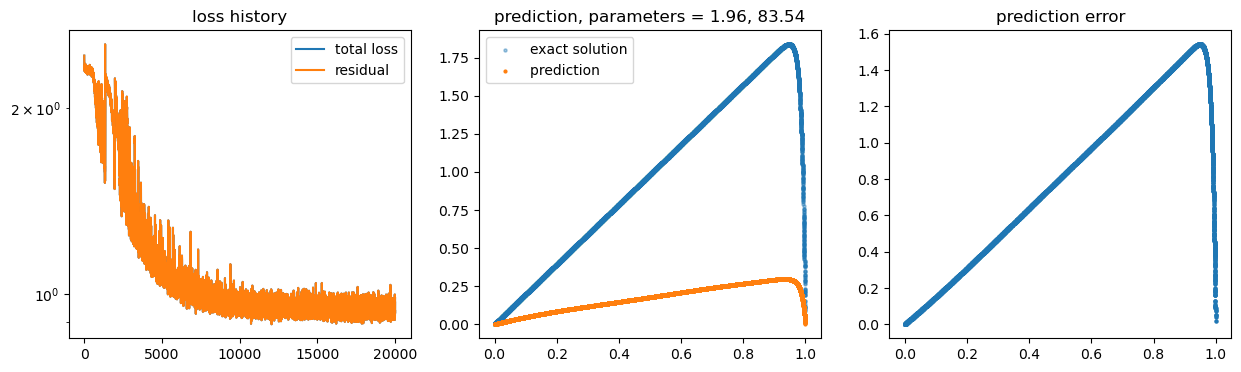

In [9]:
pde = Poisson_1D()
trainer,u_theta = Run_laplacian1D(pde)

## Error estimations

### Imports

In [10]:
from modfenics.error_estimations.error_estimations import ErrorEstimations
from modfenics.error_estimations.compare import CompareMethods

In [21]:
param_num = config["error_estimations"]["param_num"]     
error_estimations = ErrorEstimations(param_num, problem, repo_dir = repo_dir, tab_degree=[1], save_fig=True)
compare_methods = CompareMethods(error_estimations)
tab_nb_vert = error_estimations.tab_nb_vert

## Results directory: /home/flecourtier/Bureau/Article1/code/results/fenics/test_1D/testcase2/version1/cvg/param2/


### Run FEM

In [22]:
degree = 1
df_FEM, tab_h_FEM, tab_err_FEM = error_estimations.run_fem_deg(degree,new_run=True)

## Run error estimation with FEM for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.0020000000000000018
V created with  16  vertices and degree  1  : h = 0.06666666666666676
V_theta created with  16  vertices and degree  10
nb_vert=16, norme_L2=0.18540640648450887
V created with  32  vertices and degree  1  : h = 0.032258064516129115
V_theta created with  32  vertices and degree  10
nb_vert=32, norme_L2=0.0631343968823769
V created with  64  vertices and degree  1  : h = 0.015873015873015928
V_theta created with  64  vertices and degree  10
nb_vert=64, norme_L2=0.01769064243085035
V created with  128  vertices and degree  1  : h = 0.007874015748031593
V_theta created with  128  vertices and degree  10
nb_vert=128, norme_L2=0.004536218108490527
V created with  256  vertices and degree  1  : h = 0.0039215686274510775
V_theta created with  256  vertices and degree  10
nb_vert=256, norme_L2=0.0011348100666760193


In [23]:
# error_estimations.run_fem_alldeg(new_run=False,plot_cvg=False)

### Run Add

In [24]:
degree = 1
df_Corr, tab_h_Corr, tab_err_Corr = error_estimations.run_corr_deg(degree,u_theta,new_run=True)

## Run error estimation with Corr for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.0020000000000000018
V created with  16  vertices and degree  1  : h = 0.06666666666666676
V_theta created with  16  vertices and degree  10
nb_vert=16, norme_L2=0.14745115509797174
V created with  32  vertices and degree  1  : h = 0.032258064516129115
V_theta created with  32  vertices and degree  10
nb_vert=32, norme_L2=0.04997407009441341
V created with  64  vertices and degree  1  : h = 0.015873015873015928
V_theta created with  64  vertices and degree  10
nb_vert=64, norme_L2=0.01404983231424664
V created with  128  vertices and degree  1  : h = 0.007874015748031593
V_theta created with  128  vertices and degree  10
nb_vert=128, norme_L2=0.003602461318566898
V created with  256  vertices and degree  1  : h = 0.0039215686274510775
V_theta created with  256  vertices and degree  10
nb_vert=256, norme_L2=0.0009090124488311426


In [25]:
# error_estimations.run_corr_alldeg(u_theta,new_run=False,plot_cvg=False)

### Run Mult

In [26]:
tab_M = [0.0]

Strong :

In [27]:
degree = 1
error_estimations.run_mult_deg_allM(degree,u_theta,tab_M,new_run=True)

## Run error estimation with Mult for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.0020000000000000018
V created with  16  vertices and degree  1  : h = 0.06666666666666676
V_theta created with  16  vertices and degree  10
on fait du mult
nb_vert=16, norme_L2=0.14922694661250258
V created with  32  vertices and degree  1  : h = 0.032258064516129115
V_theta created with  32  vertices and degree  10
on fait du mult
nb_vert=32, norme_L2=0.0664751110311422
V created with  64  vertices and degree  1  : h = 0.015873015873015928
V_theta created with  64  vertices and degree  10
on fait du mult
nb_vert=64, norme_L2=0.033705286310141136
V created with  128  vertices and degree  1  : h = 0.007874015748031593
V_theta created with  128  vertices and degree  10
on fait du mult
nb_vert=128, norme_L2=0.01758913066660913
V created with  256  vertices and degree  1  : h = 0.0039215686274510775
V_theta created with  256  vertices and degree  10
on fait du mult
nb_vert=256, norme_L

In [28]:
# error_estimations.run_mult_alldeg_allM(u_theta,tab_M,new_run=False,plot_cvg=False)

Weak :

In [29]:
degree = 1
error_estimations.run_mult_deg_allM(degree,u_theta,tab_M,impose_bc=False,new_run=True)

## Run error estimation with Mult for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.0020000000000000018
V created with  16  vertices and degree  1  : h = 0.06666666666666676
V_theta created with  16  vertices and degree  10
on fait du mult
nb_vert=16, norme_L2=0.0016008179685127648
V created with  32  vertices and degree  1  : h = 0.032258064516129115
V_theta created with  32  vertices and degree  10
on fait du mult
nb_vert=32, norme_L2=0.0008566517769658134
V created with  64  vertices and degree  1  : h = 0.015873015873015928
V_theta created with  64  vertices and degree  10
on fait du mult
nb_vert=64, norme_L2=0.00019572437238163482
V created with  128  vertices and degree  1  : h = 0.007874015748031593
V_theta created with  128  vertices and degree  10
on fait du mult
nb_vert=128, norme_L2=7.831605932746009e-05
V created with  256  vertices and degree  1  : h = 0.0039215686274510775
V_theta created with  256  vertices and degree  10
on fait du mult
nb_vert=256

In [30]:
# error_estimations.run_mult_alldeg_allM(u_theta,tab_M,new_run=False,impose_bc=False,plot_cvg=False)

### Save results

/home/u2/lecourtier/Article1/code/results/fenics/test_1D/testcase2/version2/cvg/param2/Mult_case2_v2_param2_degree1_M0.0.csv


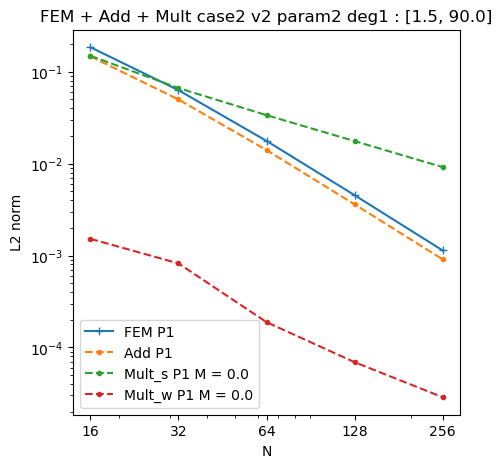

In [21]:
compare_methods.plot_Mult_vs_Add_vs_FEM_alldeg_allM(tab_M)

In [22]:
compare_methods.save_tab_alldeg_allM(tab_M)

/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:193: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')


## Derivatives

In [13]:
import numpy as np
from scimba.equations.domain import SpaceTensor
from testcases.utils import select_param

N=1000

param_num = config["error_estimations"]["param_num"]    
params = [select_param(problem,param_num)]

XXYY = np.linspace(0, 1, N)
XXYY = XXYY.reshape(-1,1)

X_test = torch.tensor(XXYY,requires_grad=True)
X_test = SpaceTensor(X_test,torch.zeros_like(X_test,dtype=int))

# get parameters
nb_params = len(trainer.pde.parameter_domain)
shape = (XXYY.shape[0],nb_params)
ones = torch.ones(shape)
mu_test = (torch.Tensor(params[0]).to(device) * ones).to(device)

u_ex = pde.reference_solution(X_test, mu_test).cpu().detach().numpy()[:,0]
du_ex_dx = pde.reference_solution_derivative(X_test, mu_test).cpu().detach().numpy()[:,0]
d2u_ex_dx2 = pde.reference_solution_second_derivative(X_test, mu_test).cpu().detach().numpy()[:,0]

pred = u_theta.setup_w_dict(X_test, mu_test)
u_theta.get_first_derivatives(pred, X_test)
u_theta.get_second_derivatives(pred, X_test)
        
u_theta_ = pred["w"][:,0].cpu().detach().numpy()
u_theta_x = pred["w_x"][:,0].cpu().detach().numpy()
u_theta_xx = pred["w_xx"][:,0].cpu().detach().numpy()

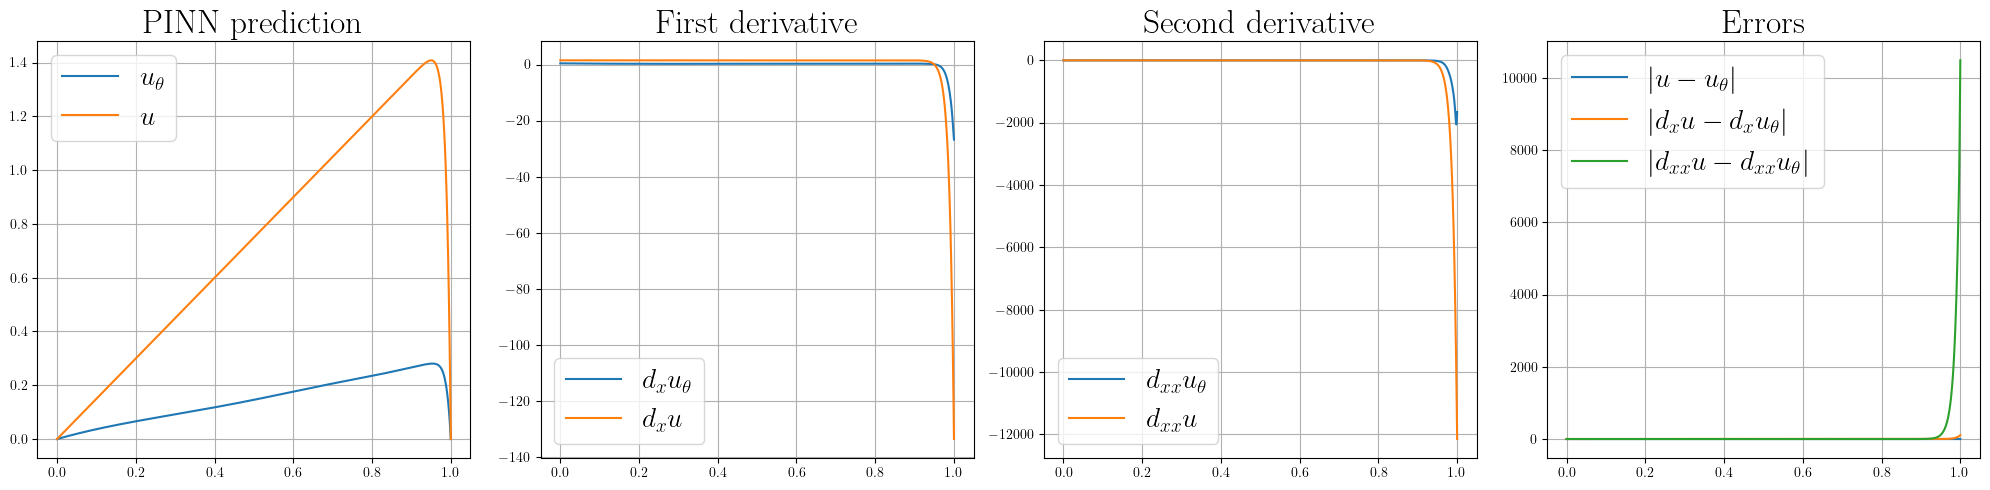

In [15]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

# Définir les tailles pour les titres et les légendes
title_size = 24  # Taille des titres
legend_size = 20  # Taille des légendes

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# plot u
axs[0].plot(XXYY, u_theta_, label=r"$u_\theta$")
axs[0].plot(XXYY, u_ex, label=r"$u$")
axs[0].set_title("PINN prediction", fontsize=title_size)
axs[0].legend(fontsize=legend_size)

# plot du/dx
axs[1].plot(XXYY, u_theta_x, label=r"$d_xu_\theta$")
axs[1].plot(XXYY, du_ex_dx, label=r"$d_xu$")
axs[1].set_title("First derivative", fontsize=title_size)
axs[1].legend(fontsize=legend_size)

# plot d2u/dx2
axs[2].plot(XXYY, u_theta_xx, label=r"$d_{xx}u_\theta$")
axs[2].plot(XXYY, d2u_ex_dx2, label=r"$d_{xx}u$")
axs[2].set_title("Second derivative", fontsize=title_size)
axs[2].legend(fontsize=legend_size)

# plot error
axs[3].plot(XXYY, abs(u_ex-u_theta_), label=r"$|u-u_\theta|$")
axs[3].plot(XXYY, abs(du_ex_dx-u_theta_x), label=r"$|d_xu-d_xu_\theta|$")
axs[3].plot(XXYY, abs(d2u_ex_dx2-u_theta_xx), label=r"$|d_{xx}u-d_{xx}u_\theta|$")
axs[3].set_title("Errors", fontsize=title_size)
axs[3].legend(fontsize=legend_size)

# Ajouter une grille
for ax in axs:
    ax.grid()

# Affichage de la figure
version_str = f"version{version}"
results_dir = repo_dir + f"/results/fenics/test_1D/testcase{testcase}/{version_str}/cvg/param{param_num}/"

fig.tight_layout()
plt.gca().set_rasterization_zorder(-1)
plt.savefig(results_dir+f"derivatives_mu{param_num}.pdf",bbox_inches='tight',format="pdf")

## Gains

### Imports

In [ ]:
from modfenics.gains.gains import GainsEnhancedFEM
from modfenics.gains.compare import CompareGainsMethods

In [24]:
n_params = config["gains"]["n_params"]   
gains_enhanced_fem = GainsEnhancedFEM(n_params, problem, repo_dir = repo_dir, tab_degree=[1])
compare_gains_methods = CompareGainsMethods(gains_enhanced_fem)

## Results directory: /home/u2/lecourtier/Article1/code/results/fenics/test_1D/testcase2/version2/gains/


### Run FEM

In [10]:
degree = 1
df_FEM, tab_h_FEM, tab_err_FEM = gains_enhanced_fem.run_fem_deg(degree,new_run=False)

NameError: name 'gains_enhanced_fem' is not defined

In [26]:
# gains_enhanced_fem.run_fem_alldeg(new_run=False)

### Run PINNs

In [27]:
degree = 1
df_PINNs, tab_h_PINNs, tab_err_PINNs = gains_enhanced_fem.run_pinns_deg(degree,u_theta,new_run=False)

## Run errrors with PINNs for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.0020000000000000018
nb_vert=20
V created with  20  vertices and degree  4  : h = 0.052631578947368474
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 nb_vert=40
V created with  40  vertices and degree  4  : h = 0.02564102564102566
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [28]:
# gains_enhanced_fem.run_pinns_alldeg(new_run=False)

### Run Add

In [29]:
degree = 1
df_Corr, tab_h_Corr, tab_err_Corr = gains_enhanced_fem.run_corr_deg(degree,u_theta,new_run=False)

## Run errrors with Corr for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.0020000000000000018
nb_vert=20
V created with  20  vertices and degree  4  : h = 0.052631578947368474
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 nb_vert=40
V created with  40  vertices and degree  4  : h = 0.02564102564102566
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [30]:
# gains_enhanced_fem.run_corr_alldeg(u_theta,new_run=False)

### Run Mult

In [31]:
tab_M = [0.0]

Strong :

In [32]:
degree = 1
gains_enhanced_fem.run_mult_deg_allM(degree,u_theta,tab_M,new_run=False)

## Run errrors with Mult for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.0020000000000000018
nb_vert=20
V created with  20  vertices and degree  4  : h = 0.052631578947368474
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 nb_vert=40
V created with  40  vertices and degree  4  : h = 0.02564102564102566
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [33]:
# gains_enhanced_fem.run_mult_alldeg_allM(u_theta,tab_M,new_run=False)

Weak :

In [34]:
degree = 1
gains_enhanced_fem.run_mult_deg_allM(degree,u_theta,tab_M,impose_bc=False,new_run=False)

## Run errrors with Mult for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.0020000000000000018
nb_vert=20
V created with  20  vertices and degree  4  : h = 0.052631578947368474
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 nb_vert=40
V created with  40  vertices and degree  4  : h = 0.02564102564102566
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [35]:
# gains_enhanced_fem.run_mult_alldeg_allM(u_theta,tab_M,impose_bc=False,new_run=False)

### Compare methods

In [36]:
degree = 1
# df_errors,df_gains = 
df_errors = compare_gains_methods.create_dferrors_deg_allM(degree,tab_M)

/home/u2/lecourtier/Article1/code/results/fenics/test_1D/testcase2/version2/gains/FEM_errors_case2_v2_degree1.csv


In [37]:
df_gains = compare_gains_methods.create_dataframes_deg_allM(degree,tab_M)

/home/u2/lecourtier/Article1/code/results/fenics/test_1D/testcase2/version2/gains/FEM_errors_case2_v2_degree1.csv


In [38]:
# compare_gains_methods.create_dataframes_alldeg_allM(tab_M)

In [39]:
df_stats = compare_gains_methods.save_stats_deg_allM(degree,tab_M)

/home/u2/lecourtier/Article1/code/results/fenics/test_1D/testcase2/version2/gains/FEM_errors_case2_v2_degree1.csv
method                PINNs                                FEM          \
type                    min       max     mean      std    min     max   
method       n_vert                                                      
Corr         20        6.98     94.66    17.98    16.74   1.20   48.26   
             40       21.11    372.28    68.74    70.46   1.20   43.74   
Mult0.0      20        5.02     19.16     9.32     2.49   0.33   12.68   
             40        9.94     38.83    18.85     4.45   0.16    6.34   
Mult_weak0.0 20       75.82   6276.47  1476.11  1086.00  65.90  352.37   
             40      280.58  25023.19  4439.87  3659.46  56.69  255.11   

method                              
type                   mean    std  
method       n_vert                 
Corr         20        3.34   6.37  
             40        3.29   6.10  
Mult0.0      20        1.58   1.70

/home/u2/lecourtier/Article1/code/src/modfenics/gains/compare.py:251: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_stats_round = df_stats.applymap(lambda x: f"{x:.2f}")
